In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df['Species'].replace(({"Iris-setosa":"0","Iris-versicolor":"1","Iris-virginica":"2"}),inplace=True)

/tmp/ipykernel_18/1894937789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Species'].replace(({"Iris-setosa":"0","Iris-versicolor":"1","Iris-virginica":"2"}),inplace=True)


In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [7]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

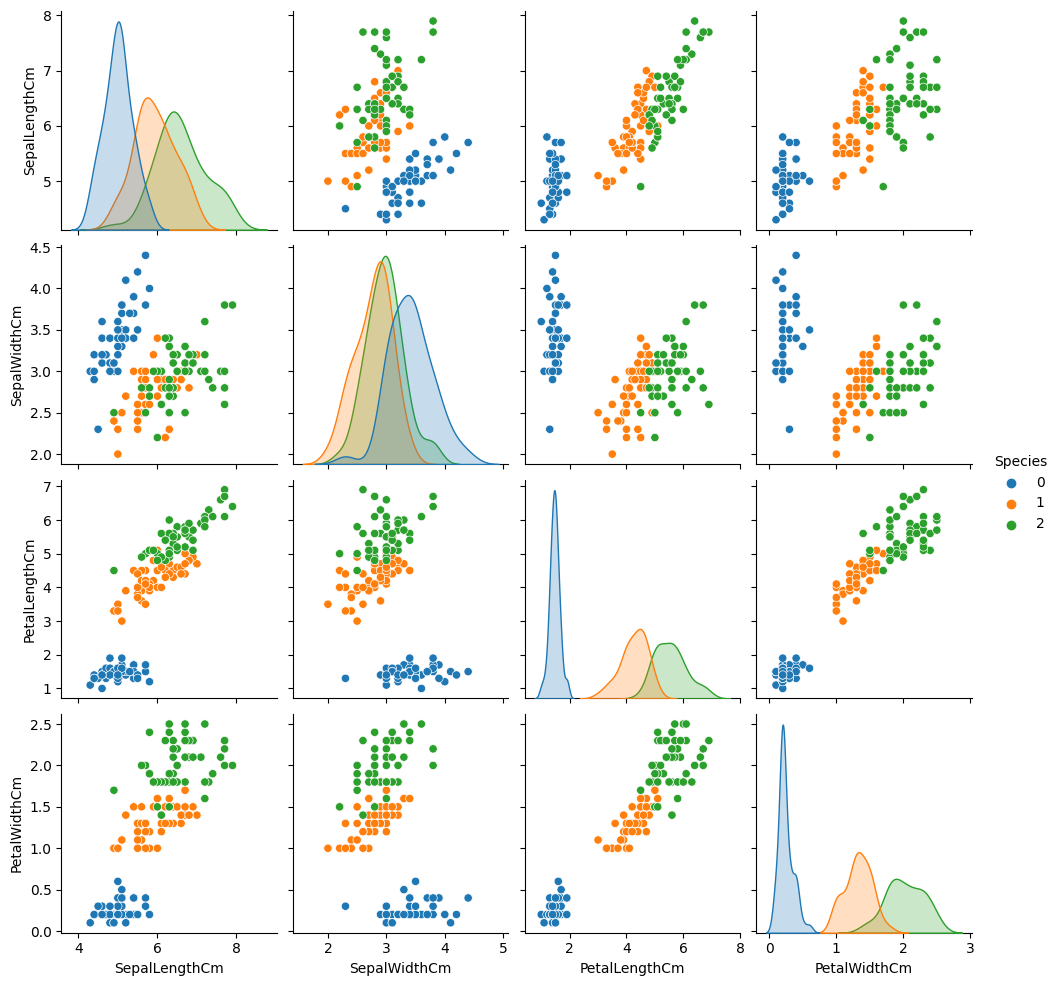

In [8]:
sns.pairplot(df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]],hue='Species')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test=train_test_split(df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],df['Species'],test_size=0.2)

In [11]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
140,6.7,3.1,5.6,2.4
91,6.1,3.0,4.6,1.4
118,7.7,2.6,6.9,2.3
79,5.7,2.6,3.5,1.0
...,...,...,...,...
64,5.6,2.9,3.6,1.3
74,6.4,2.9,4.3,1.3
148,6.2,3.4,5.4,2.3
90,5.5,2.6,4.4,1.2


In [12]:
len(x_test)

30

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
rg=LogisticRegression()

In [15]:
rg.fit(x_test,y_test)

LogisticRegression()

In [16]:
rg.predict(x_test)

array(['1', '0', '1', '2', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '0', '1', '1', '2', '0', '0', '2', '2', '0', '0', '2',
       '1', '1', '2', '0'], dtype=object)

In [17]:
rg.score(x_test,y_test)

0.9666666666666667